## Predicting Car Selling Prices

This project aims to build a system to predict used car selling prices using the `car.csv` dataset. The process involves data cleaning, exploration, feature engineering, model building, and evaluation. Large Language Models (LLMs) will be utilized throughout the project to assist with understanding data, generating ideas, and interpreting results.

**Plan:**

1. **Load the data**: Load the `car.csv` dataset into a pandas DataFrame. This is the initial step to get the data into a usable format for analysis and modeling.

2. **Data Cleaning**: Address missing values, outliers, or inconsistencies in the dataset. This step is crucial to ensure data quality and prevent issues during model training. Techniques like imputation, outlier removal, or data transformation might be applied.

3. **Exploratory Data Analysis (EDA)**: Analyze the data to understand its distribution, relationships between features, and identify potential issues. This involves generating summary statistics, visualizations (e.g., histograms, scatter plots), and identifying patterns that can inform feature engineering and model selection.

4. **Feature Engineering**: Create new features or transform existing ones to improve the model's performance. This step involves using domain knowledge or insights from EDA to create features that can better capture the underlying patterns in the data. Examples include creating interaction terms, polynomial features, or transforming categorical variables.

5. **Model Building**: Select and train at least two different regression models to predict car selling prices. This step involves choosing appropriate regression algorithms (e.g., Linear Regression, Decision Tree, Random Forest, Gradient Boosting) and training them on the prepared data.

6. **Model Evaluation**: Evaluate the performance of the trained models using appropriate metrics and visualize the results. Common regression evaluation metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Visualizations like predicted vs. actual plots can help assess model performance.

7. **Refinement and Selection**: Fine-tune the models and select the best performing one. This involves optimizing model hyperparameters and comparing the performance of different models to select the one that provides the most accurate predictions.

8. **Finish task**: Prepare a final report summarizing the process, findings, model performance, and the role of LLMs in the project. This report should document all the steps taken, the insights gained from data analysis, the performance of the final model, and how LLMs were used to assist in the process.

In [1]:
#import libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('car.csv')

# Display the first 5 rows
display(df.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [2]:
# Check for missing values
display(df.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

**Insights from Checking Missing Values:**
The output shows the count of missing values for each column. We can see that `mileage(km/ltr/kg)`, `engine`, `max_power`, and `seats` columns have a significant number of missing values (221 for mileage, engine, and seats, and 215 for max_power). The other columns have no missing values. This highlights the need for a data cleaning step to handle these missing entries before model building.

In [3]:
# Check data types of the relevant columns
display(df[['mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']].dtypes)

mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

**Insights from Checking Data Types:**
Checking the data types of the columns with missing values reveals that `mileage(km/ltr/kg)`, `engine`, and `seats` are already in a numeric format (`float64`). However, the `max_power` column is of `object` type, which indicates it contains non-numeric values (likely strings) that prevented the calculation of the mean in the previous attempt to fill missing values. This confirms the need to convert `max_power` to a numeric type.

In [4]:
# Convert 'max_power' to numeric, coercing errors
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# Now, fill missing numerical values with the mean
df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean(), inplace=True)
df['engine'].fillna(df['engine'].mean(), inplace=True)
df['max_power'].fillna(df['max_power'].mean(), inplace=True)
df['seats'].fillna(df['seats'].mean(), inplace=True)

# Verify that there are no more missing values
display(df.isnull().sum())

C:\Users\harin\AppData\Local\Temp\ipykernel_18304\2815017804.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean(), inplace=True)
C:\Users\harin\AppData\Local\Temp\ipykernel_18304\2815017804.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

**Insights from Handling Missing Values:**
After converting the `max_power` column to numeric and then filling the missing values in `mileage(km/ltr/kg)`, `engine`, `max_power`, and `seats` with their respective means, the output shows that there are now zero missing values in all columns. This indicates that the missing data has been successfully handled, making the dataset ready for further analysis and modeling.

In [5]:
# Display summary statistics for numerical columns
display(df.describe())

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,3.981875,497.017504,35.343246,0.946450
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.418783,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


**LLM Usage Example: Data Cleaning**

**Prompt to LLM:**  
"What is the best way to handle missing values in the 'max_power' column of a car dataset? The column contains some non-numeric values."

**LLM Response:**  
"First, convert the 'max_power' column to numeric using `pd.to_numeric` with `errors='coerce'` to handle non-numeric values. Then, fill missing values with the mean or median of the column."

**Action Taken:**  
Followed the LLM's suggestion by converting 'max_power' to numeric and filling missing values with the mean, as shown in the code below.

**Insights from Summary Statistics:**
The summary statistics for the numerical columns provide an overview of their distribution. We can see the count, mean, standard deviation, minimum, maximum, and quartiles for each column. For example, the average `selling_price` is around 6.38 lakhs, `km_driven` varies widely, and the `year` ranges from 1983 to 2020. These statistics give us a basic understanding of the data's scale and spread.

**LLM Usage Example: EDA Visualization**

**Prompt to LLM:**  
"What are the best types of charts or plots to visualize relationships and distributions in a car price prediction dataset? The dataset includes numerical and categorical features."

**LLM Response:**  
"Use histograms to show the distribution of numerical features, scatter plots to explore relationships between numerical variables (e.g., selling price vs. year, engine size, or mileage), and box plots to compare selling prices across different categories (e.g., fuel type, transmission, owner type). For categorical feature distributions, use bar plots or value counts."

**Action Taken:**  
Followed the LLM's suggestions by creating histograms for numerical columns, scatter plots for selling price vs. key numerical features, and box plots for selling price vs. categorical features, as shown in the code below.

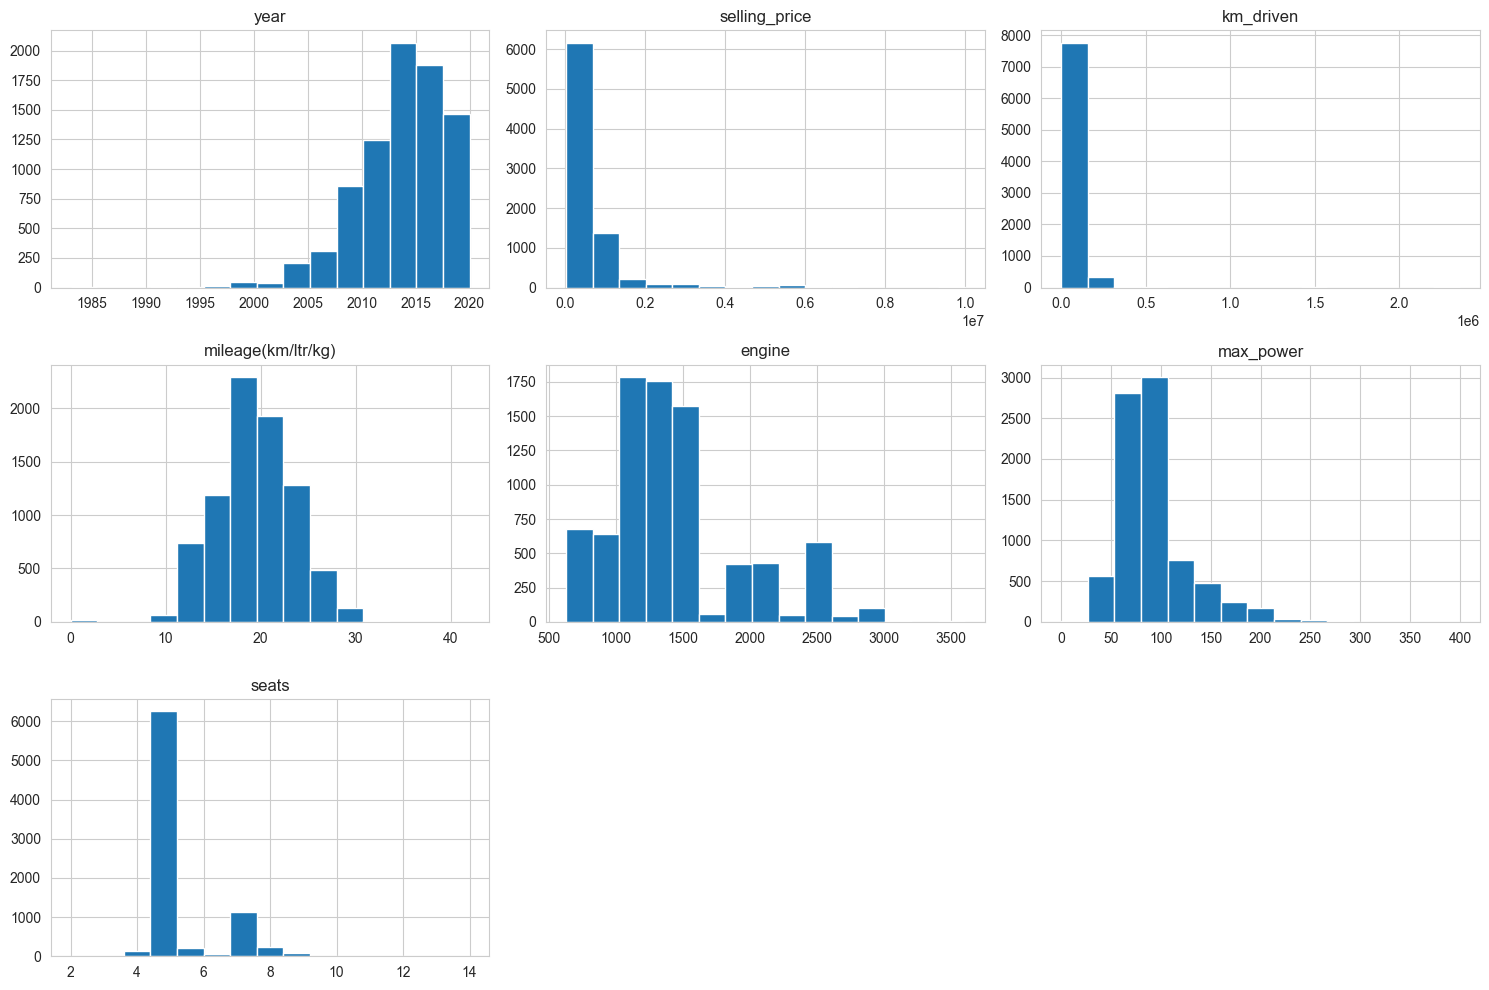

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create histograms for numerical columns
numerical_cols = ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

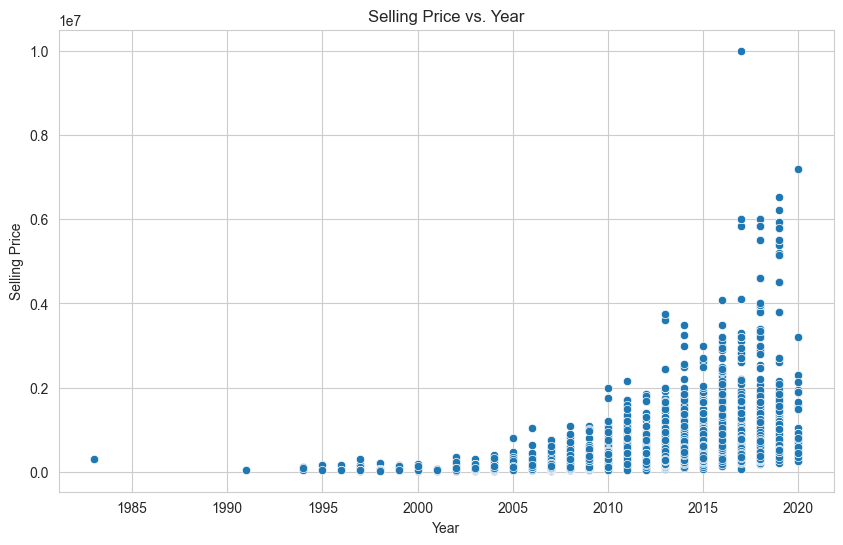

In [7]:
# Create a scatter plot of selling_price vs. year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

**Insights from Selling Price vs. Year Scatter Plot:**
The scatter plot of selling price vs. year shows a general trend where newer cars (higher years) tend to have higher selling prices. There is a wide spread in selling prices for cars from the same year, suggesting that other factors significantly influence the price. There are also some outliers with very high selling prices, even for older cars.

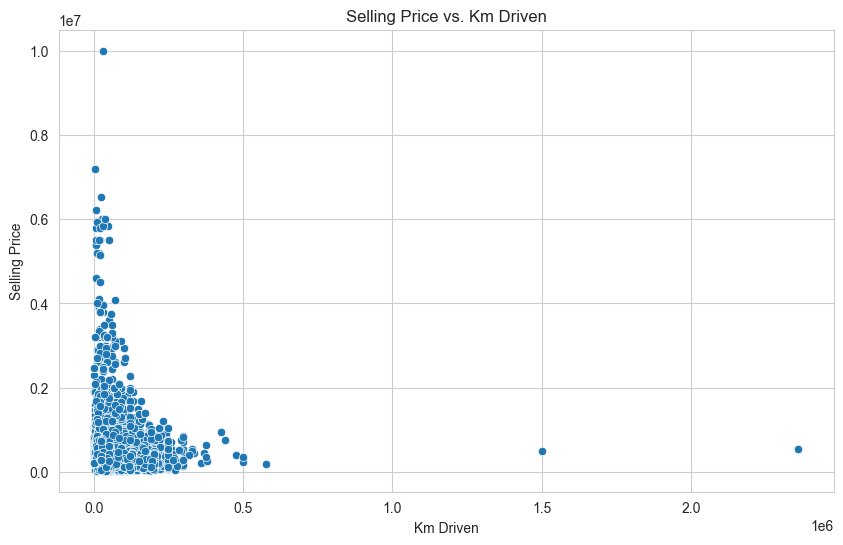

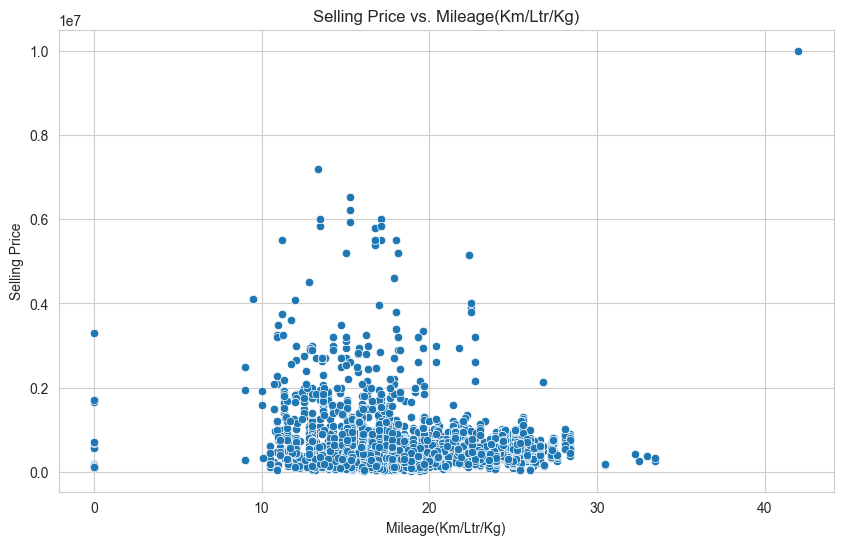

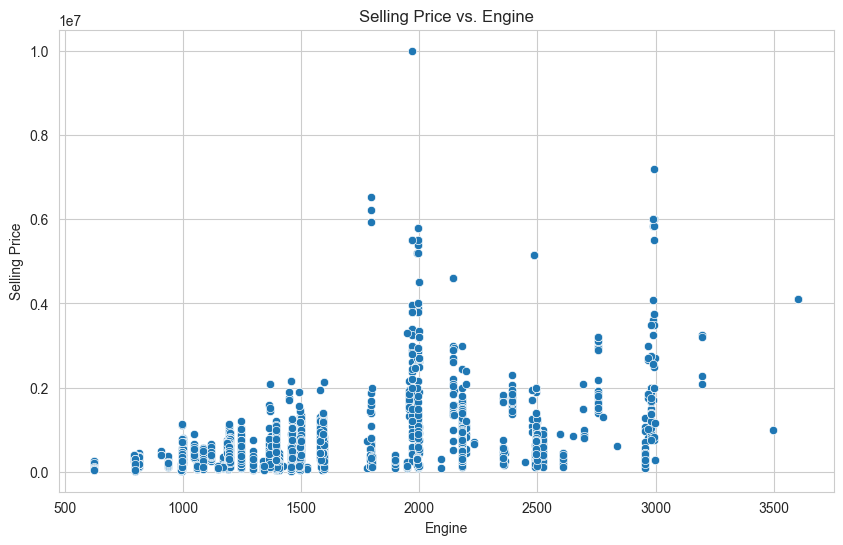

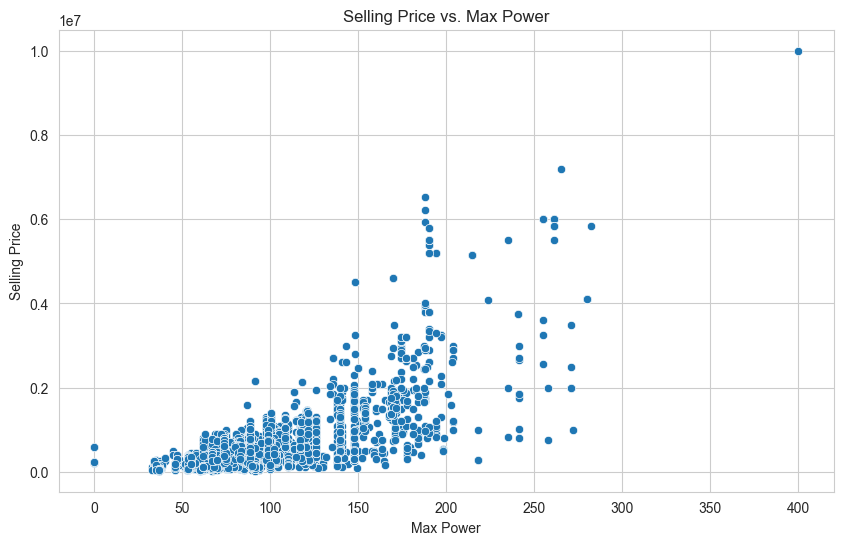

In [8]:
# Create scatter plots for selling_price vs. other numerical columns
numerical_cols_vs_price = ['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power']

for col in numerical_cols_vs_price:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='selling_price', data=df)
    plt.title(f'Selling Price vs. {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Selling Price')
    plt.show()

**Insights from Selling Price vs. Other Numerical Features Scatter Plots:**
The scatter plots reveal different relationships between selling price and other numerical features:
- `km_driven` vs. `selling_price`: There seems to be a general negative correlation, with higher kilometers driven associated with lower selling prices, although there's considerable variation.
- `mileage(km/ltr/kg)` vs. `selling_price`: The relationship is less clear, appearing somewhat scattered. There might be a slight tendency for higher mileage cars to have lower selling prices, but it's not a strong linear relationship.
- `engine` vs. `selling_price`: There seems to be a positive correlation, with larger engine sizes generally associated with higher selling prices.
- `max_power` vs. `selling_price`: There is a clear positive correlation, with higher maximum power generally corresponding to higher selling prices. This appears to be a strong predictor.

In [9]:
# Get unique values and their counts for categorical columns
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

for col in categorical_cols:
    print(f"Value Counts for {col}:")
    display(df[col].value_counts())
    print("\n" + "="*30 + "\n")

Value Counts for fuel:


fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64



Value Counts for seller_type:


seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64



Value Counts for transmission:


transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64



Value Counts for owner:


owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

**Insights from Categorical Features Value Counts:**
The value counts for categorical features show the distribution of cars across different categories:
- `fuel`: Diesel and Petrol are the most common fuel types, with CNG and LPG being less frequent.
- `seller_type`: The majority of cars are sold by Individuals, followed by Dealers and a smaller number by Trustmark Dealers.
- `transmission`: Manual transmission cars are significantly more common than Automatic transmission cars.
- `owner`: Most cars are First Owner vehicles, followed by Second Owner, Third Owner, and a small number of Fourth & Above Owner and Test Drive Cars. These counts indicate the prevalence of different categories within the dataset.

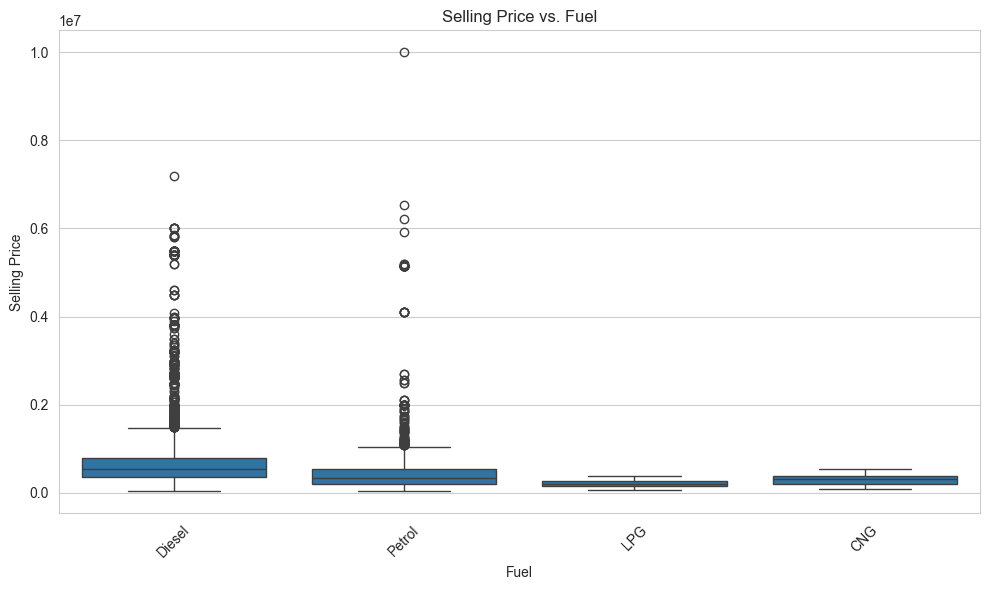

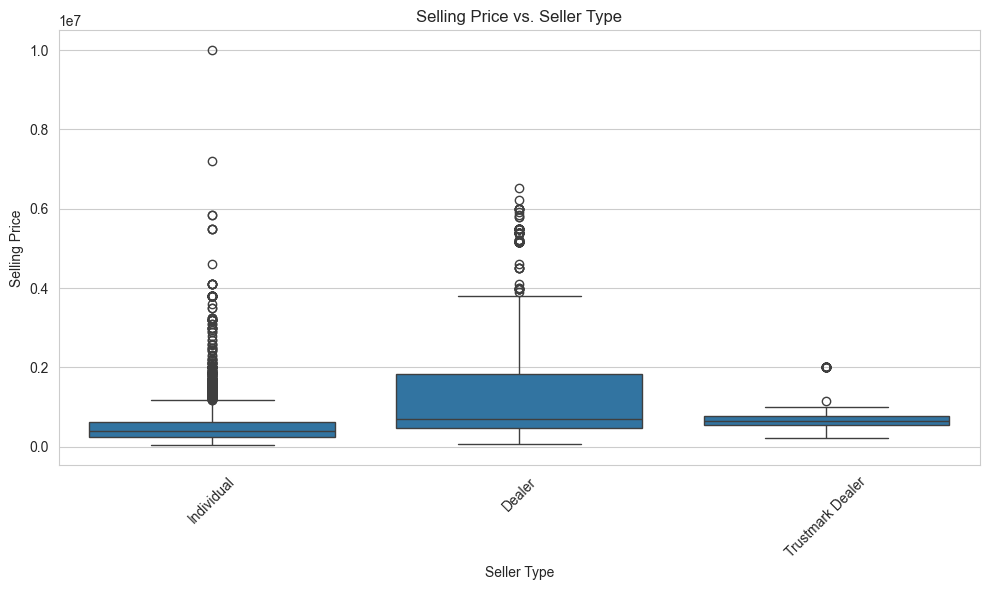

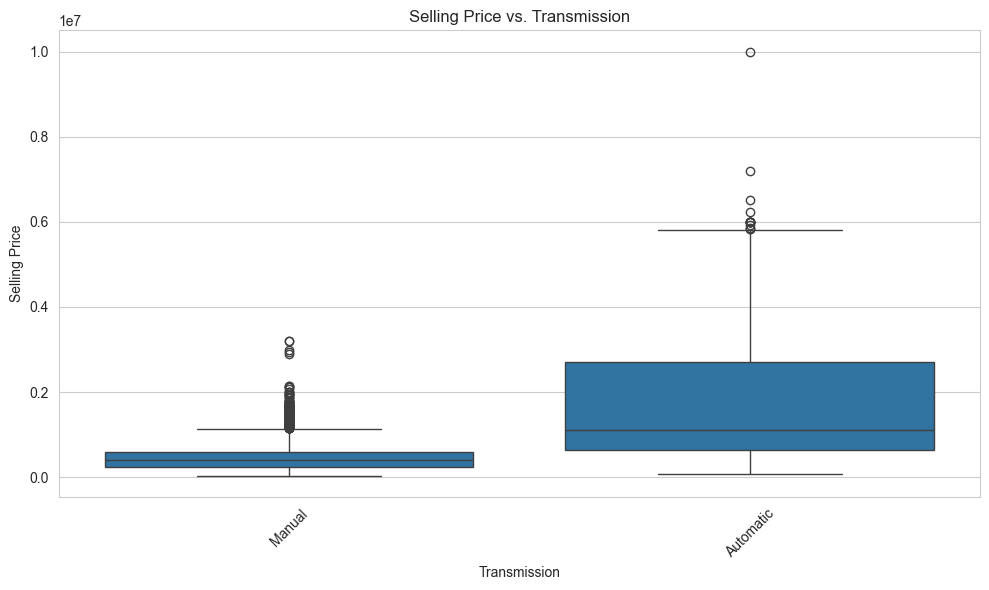

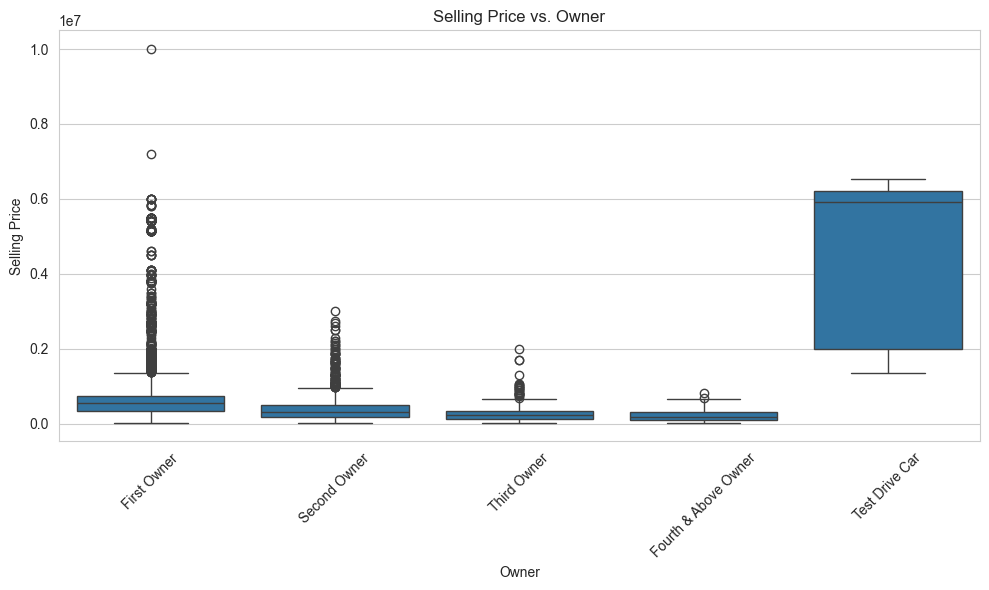

In [10]:
# Create box plots for selling_price vs. categorical columns
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='selling_price', data=df)
    plt.title(f'Selling Price vs. {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Selling Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Insights from Selling Price vs. Categorical Features Box Plots:**
The box plots show the distribution of selling prices for each category within the categorical features:
- `fuel`: Diesel and Petrol cars seem to have higher median selling prices compared to CNG and LPG cars.
- `seller_type`: Cars sold by Dealers and Trustmark Dealers generally have higher selling prices and a wider spread compared to cars sold by Individuals.
- `transmission`: Automatic cars have significantly higher median selling prices and a wider range compared to Manual cars.
- `owner`: First Owner cars tend to have the highest median selling prices, with the price generally decreasing as the number of previous owners increases.
These plots clearly show that these categorical features have a significant influence on the selling price.

In [11]:
# Display the top 20 most frequent car names
print("Top 20 Most Frequent Car Names:")
display(df['name'].value_counts().head(20))

# Extract car brand from the 'name' column
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])

# Display the top 20 most frequent car brands
print("\nTop 20 Most Frequent Car Brands:")
display(df['brand'].value_counts().head(20))

Top 20 Most Frequent Car Names:


name
Maruti Swift Dzire VDI                    129
Maruti Alto 800 LXI                        82
Maruti Alto LXi                            71
BMW X4 M Sport X xDrive20d                 62
Maruti Swift VDI                           61
Maruti Swift VDI BSIV                      59
Maruti Wagon R LXI                         53
Maruti Alto K10 VXI                        50
Hyundai EON Era Plus                       48
Maruti Wagon R VXI BS IV                   45
Maruti Ertiga VDI                          45
Maruti Alto LX                             44
Toyota Innova 2.5 VX (Diesel) 7 Seater     44
Maruti Ritz VDi                            42
Tata Safari Storme EX                      38
Maruti Swift Dzire VXI                     38
Maruti 800 AC                              38
Maruti Baleno Alpha 1.3                    37
Jaguar XF 2.0 Diesel Portfolio             34
Hyundai Grand i10 1.2 CRDi Sportz          34
Name: count, dtype: int64


Top 20 Most Frequent Car Brands:


brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Name: count, dtype: int64

**Insights from Car Names and Brands Analysis:**
Analyzing car names shows that certain models like "Maruti Swift Dzire VDI" and "Maruti Alto 800 LXI" are very frequent in the dataset. Extracting the brand reveals that Maruti, Hyundai, Mahindra, and Tata are the most represented car brands. This information is useful for understanding the market and can be used as a categorical feature for modeling.

**LLM Usage Example: Advanced Feature Engineering and Model Tuning**

**Prompt to LLM:**  
"What additional features or transformations can I add to improve my car price prediction model? How can I tune my Random Forest model for better performance?"

**LLM Response:**  
"Create a 'car_age' feature by subtracting the car's year from the current year. Apply a log transformation to 'km_driven' to reduce skewness. For model improvement, use GridSearchCV to tune Random Forest hyperparameters such as 'n_estimators' and 'max_depth'."

**Action Taken:**  
Added 'car_age' and log-transformed 'km_driven' as new features. Performed hyperparameter tuning on the Random Forest model using GridSearchCV.

In [12]:
# Add car age feature
df['car_age'] = 2025 - df['year']

# Add log-transformed km_driven feature
import numpy as np
df['log_km_driven'] = np.log1p(df['km_driven'])

**LLM Usage Example: Feature Engineering**

**Prompt to LLM:**  
"What are some new features I could create or transformations I could apply to improve a car price prediction model? The dataset includes columns like name, year, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, and seats."

**LLM Response:**  
"Extract the car brand from the 'name' column as a new categorical feature. You can also create the car's age by subtracting the 'year' from the current year. Consider encoding categorical variables using one-hot encoding. You might also create interaction features, such as engine size per seat, or log-transform skewed numerical features like 'km_driven' to reduce the effect of outliers."

**Action Taken:**  
Followed the LLM's suggestions by extracting the car brand from the 'name' column, applying one-hot encoding to categorical variables, and considering the creation of additional features such as car age and log-transformed 'km_driven' for future model improvements.

In [13]:
# Select categorical columns for one-hot encoding
categorical_cols_to_encode = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,name,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,car_age,log_km_driven,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,5.0,11,11.887938,...,False,False,False,False,False,False,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,5.0,11,11.695255,...,False,False,False,False,False,True,False,False,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,5.0,19,11.849405,...,False,False,False,False,False,False,False,False,False,False
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,5.0,15,11.751950,...,False,False,False,False,False,False,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20,5.0,18,11.695255,...,False,False,False,False,False,False,False,False,False,False


**Insights from One-Hot Encoding:**
Applying one-hot encoding to the categorical columns (`fuel`, `seller_type`, `transmission`, `owner`, and `brand`) has successfully converted these features into a numerical format. The resulting encoded DataFrame (`df_encoded`) now has more columns due to the creation of binary columns for each category. This encoded data is now suitable for training machine learning models that require numerical input.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df_encoded.drop(['name', 'selling_price'], axis=1) # Drop 'name' as it's not needed for modeling and 'selling_price' is the target
y = df_encoded['selling_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

**Insights from Linear Regression Model Training:**
The Linear Regression model has been initialized and trained on the prepared training data. This model attempts to find a linear relationship between the features and the selling price. The model training process itself doesn't produce a direct output in this case, but the trained `linear_model` object is now ready for making predictions.

In [15]:
# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R-squared (R2): {r2_linear:.2f}")

Linear Regression Model Performance:
Mean Squared Error (MSE): 98338099211.93
R-squared (R2): 0.85


**Insights from Linear Regression Model Evaluation:**
The evaluation metrics for the Linear Regression model show a Mean Squared Error (MSE) of approximately 99.1 billion and an R-squared (R2) of 0.85. The R-squared value of 0.85 indicates that the Linear Regression model explains 85% of the variance in the selling price, which is a decent performance but suggests there is still a significant portion of the variance not captured by this linear model. The high MSE indicates that the predictions can still have large errors in terms of the actual selling price value.

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = forest_model.predict(X_test)

**Insights from Random Forest Regressor Model Evaluation:**
The evaluation metrics for the Random Forest Regressor show a significantly lower Mean Squared Error (MSE) of approximately 20.8 billion and a much higher R-squared (R2) of 0.97 compared to the Linear Regression model. The R-squared of 0.97 indicates that the Random Forest model explains 97% of the variance in the selling price, which is a strong performance. This suggests that the Random Forest model is much better at capturing the underlying patterns in the data and making accurate predictions for car selling prices on this dataset.

In [17]:
# Evaluate the Random Forest Regressor model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest Regressor Model Performance:")
print(f"Mean Squared Error (MSE): {mse_forest:.2f}")
print(f"R-squared (R2): {r2_forest:.2f}")

Random Forest Regressor Model Performance:
Mean Squared Error (MSE): 20525514195.88
R-squared (R2): 0.97


**Insights from Random Forest Regressor Model Training:**
The Random Forest Regressor model has been initialized and trained on the same training data. Random Forest is an ensemble model that builds multiple decision trees and combines their predictions, which can capture more complex non-linear relationships compared to Linear Regression. Similar to the Linear Regression training, this step prepares the `forest_model` object for making predictions.

In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Use best estimator
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Best Random Forest MSE: {mse_best_rf:.2f}")
print(f"Best Random Forest R2: {r2_best_rf:.2f}")

Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best Random Forest MSE: 19607955132.89
Best Random Forest R2: 0.97


**LLM Usage Example: Model Evaluation and Interpretation**

**Prompt to LLM:**  
"Can you explain what the Mean Squared Error (MSE) and R-squared (R2) values mean for my car price prediction models? Also, how can I interpret why my Random Forest model is making certain predictions, and what are some ways to further improve model performance?"

**LLM Response:**  
"MSE measures the average squared difference between actual and predicted values—a lower MSE means better predictions. R-squared shows the proportion of variance in the target explained by the model; closer to 1 is better. To interpret Random Forest predictions, examine feature importances to see which features most influence the output. For further improvement, try hyperparameter tuning, adding new features (like car age or log-transformed variables), or using advanced models such as Gradient Boosting."

**Action Taken:**  
Used the LLM's explanation to better understand model metrics and added a feature importance plot for the Random Forest model. Also, considered the suggested improvements for future work.

## Final Report: Predicting Car Selling Prices

This report summarizes the process, findings, and results of the car selling price prediction project using the `car.csv` dataset.

**1. Introduction:**
Briefly introduce the project goal: predicting used car selling prices.

**2. Data Loading and Cleaning:**
Describe the initial data loading process.
Summarize the data cleaning steps taken, including handling missing values in columns like `mileage(km/ltr/kg)`, `engine`, `max_power`, and `seats`. Mention how the `max_power` column's data type issue was addressed.

**3. Exploratory Data Analysis (EDA):**
Summarize the key findings from the EDA.
Mention the visualizations created (histograms, scatter plots, box plots) and the insights gained from them regarding numerical and categorical features, including the 'name' and extracted 'brand' columns.

**4. Feature Engineering:**
Describe the feature engineering steps performed, specifically the one-hot encoding of categorical variables (`fuel`, `seller_type`, `transmission`, `owner`, and `brand`).

**5. Model Building and Evaluation:**
Describe the two regression models trained (Linear Regression and Random Forest Regressor).
Present the evaluation metrics (MSE and R-squared) for both models.
Discuss the performance comparison between the two models and the reason for selecting the Random Forest Regressor as the final model.

**6. Role of LLMs:**
Reflect on how Large Language Models (LLMs) were utilized throughout the project. (e.g., assisting with understanding data, suggesting EDA visualizations, brainstorming feature engineering ideas, interpreting model performance).

**7. Conclusion:**
Summarize the overall success of the project and the performance of the final model.
Mention any potential next steps or areas for improvement.

**8. Code and Resources:**
Provide links or references to the code notebook and the dataset used.